In [30]:
!pip install --upgrade pip
!pip install pandas matplotlib numpy scikit-learn statsmodels pyarrow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [31]:
import pandas as pd

# Load parquet files
df1 = pd.read_parquet("XHKF_HSIFM.parquet")
df2 = pd.read_parquet("XHKF_HHIFM.parquet")

# Reset the index to make TIMESTAMP a column
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

# Convert TIMESTAMP to datetime and localize to Asia/Hong_Kong
df1['TIMESTAMP'] = pd.to_datetime(df1['TIMESTAMP']).dt.tz_convert('Asia/Hong_Kong')
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP']).dt.tz_convert('Asia/Hong_Kong')

# Set TIMESTAMP back as the index
df1.set_index('TIMESTAMP', inplace=True)
df2.set_index('TIMESTAMP', inplace=True)

In [32]:
# Filter rows where STATUS == 'Open'
df1 = df1[df1['STATUS'] == 'Open']
df2 = df2[df2['STATUS'] == 'Open']

df1.shape

(700676, 10)

In [33]:
df2.shape

(700728, 10)

In [34]:
# Find common and mismatched timestamps
timestamps_df1 = set(df1.index)
timestamps_df2 = set(df2.index)

# Timestamps present in df1 but not in df2
only_in_df1 = sorted(timestamps_df1 - timestamps_df2)

# Timestamps present in df2 but not in df1
only_in_df2 = sorted(timestamps_df2 - timestamps_df1)

# Print results
print(f"Timestamps only in df1 ({len(only_in_df1)} cases):")
for ts in only_in_df1:
    print(ts)

print(f"\nTimestamps only in df2 ({len(only_in_df2)} cases):")
for ts in only_in_df2:
    print(ts)

Timestamps only in df1 (0 cases):

Timestamps only in df2 (52 cases):
2022-01-06 12:01:00+08:00
2022-01-06 12:02:00+08:00
2022-01-06 12:03:00+08:00
2022-01-06 12:04:00+08:00
2022-01-06 12:05:00+08:00
2022-01-06 12:06:00+08:00
2022-01-06 12:07:00+08:00
2022-01-06 12:08:00+08:00
2022-01-06 12:09:00+08:00
2022-01-06 12:10:00+08:00
2022-01-06 12:11:00+08:00
2022-01-06 12:12:00+08:00
2022-01-06 12:13:00+08:00
2022-01-06 12:14:00+08:00
2022-01-06 12:15:00+08:00
2022-01-06 12:16:00+08:00
2022-01-06 12:17:00+08:00
2022-01-06 12:18:00+08:00
2022-01-06 12:19:00+08:00
2022-01-06 12:20:00+08:00
2022-01-06 12:21:00+08:00
2022-01-06 12:22:00+08:00
2022-01-06 12:23:00+08:00
2022-01-06 12:24:00+08:00
2022-01-06 12:25:00+08:00
2022-01-06 12:26:00+08:00
2022-01-06 12:27:00+08:00
2022-01-06 12:28:00+08:00
2022-01-06 12:29:00+08:00
2022-01-06 12:30:00+08:00
2022-01-06 12:31:00+08:00
2022-01-06 12:32:00+08:00
2022-01-06 12:33:00+08:00
2022-01-06 12:34:00+08:00
2022-01-06 12:35:00+08:00
2022-01-06 12:36:00+

In [35]:
df2.loc["2022-01-06 12:52:00+08:00"]

MIC                    XHKF
FEEDCODE              HHIF2
STATUS                 Open
LAST_PRICE              NaN
TURNOVER_VALUE          0.0
TURNOVER_VOLUME         0.0
LAST_BID_PRICE_0     7992.0
LAST_ASK_PRICE_0     7992.0
LAST_BID_VOLUME_0       8.0
LAST_ASK_VOLUME_0       8.0
Name: 2022-01-06 12:52:00+08:00, dtype: object

In [37]:
# Drop rows with NaN values in any column for both DataFrames
df1 = df1.dropna()
df2 = df2.dropna()

In [38]:
df1.shape

(694801, 10)

In [39]:
df2.shape

(686323, 10)

In [51]:
# Align DataFrames by reindexing to the union of all timestamps
common_index = df1.index.union(df2.index)  # Combine all unique timestamps

# Reindex both DataFrames
df1_aligned = df1.reindex(common_index)
df2_aligned = df2.reindex(common_index)
df1_aligned.dropna()
df2_aligned.dropna()

,MIC,FEEDCODE,STATUS,LAST_PRICE,TURNOVER_VALUE,TURNOVER_VOLUME,LAST_BID_PRICE_0,LAST_ASK_PRICE_0,LAST_BID_VOLUME_0,LAST_ASK_VOLUME_0
TIMESTAMP,,,,,,,,,,
2021-01-04 09:16:00+08:00,XHKF,HHIF1,Open,10660.0,381306150.0,715.0,10659.0,10661.0,5.0,2.0
2021-01-04 09:17:00+08:00,XHKF,HHIF1,Open,10661.0,181147800.0,340.0,10660.0,10662.0,3.0,3.0
2021-01-04 09:18:00+08:00,XHKF,HHIF1,Open,10659.0,114089550.0,214.0,10658.0,10660.0,6.0,3.0
2021-01-04 09:19:00+08:00,XHKF,HHIF1,Open,10654.0,111394150.0,209.0,10654.0,10655.0,1.0,2.0
2021-01-04 09:20:00+08:00,XHKF,HHIF1,Open,10660.0,133737400.0,251.0,10658.0,10660.0,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-30 02:56:00+08:00,XHKF,HHIF4,Open,5814.0,10753750.0,37.0,5814.0,5815.0,13.0,53.0
2023-12-30 02:57:00+08:00,XHKF,HHIF4,Open,5814.0,1453500.0,5.0,5814.0,5815.0,13.0,65.0
2023-12-30 02:58:00+08:00,XHKF,HHIF4,Open,5815.0,18898500.0,65.0,5815.0,5816.0,12.0,13.0


In [52]:
# Print shapes to confirm alignment
print("df1_aligned shape:", df1_aligned.shape)
print("df2_aligned shape:", df2_aligned.shape)

df1_aligned shape: (698399, 10)
df2_aligned shape: (698399, 10)


In [53]:
# Combine indices to ensure alignment
common_index = df1_cleaned.index.intersection(df2_cleaned.index)

# Filter both DataFrames to keep only common indices
df1_cleaned = df1_cleaned.loc[common_index]
df2_cleaned = df2_cleaned.loc[common_index]

# Remove rows where TURNOVER_VOLUME is negative in either DataFrame
df1_cleaned = df1_cleaned[df1_cleaned['TURNOVER_VOLUME'] >= 0]
df2_cleaned = df2_cleaned[df2_cleaned['TURNOVER_VOLUME'] >= 0]

# Align both DataFrames again after filtering
common_index = df1_cleaned.index.intersection(df2_cleaned.index)
df1_cleaned = df1_cleaned.loc[common_index]
df2_cleaned = df2_cleaned.loc[common_index]

# Drop rows with any NaN values in either DataFrame
df1_cleaned = df1_cleaned.dropna()
df2_cleaned = df2_cleaned.dropna()

# Align both DataFrames after dropping NaN
common_index = df1_cleaned.index.intersection(df2_cleaned.index)
df1_cleaned = df1_cleaned.loc[common_index]
df2_cleaned = df2_cleaned.loc[common_index]

# Confirm results
print(f"Number of rows in df1 after cleaning: {len(df1_cleaned)}")
print(f"Number of rows in df2 after cleaning: {len(df2_cleaned)}")

Number of rows in df1 after cleaning: 682724
Number of rows in df2 after cleaning: 682724


In [55]:
# Drop specified columns from df1_cleaned and df2_cleaned
df1_cleaned = df1_cleaned.drop(columns=["STATUS"])
df2_cleaned = df2_cleaned.drop(columns=["STATUS"])

# Confirm the result
print("Columns in df1_cleaned after dropping specified columns:")
print(df1_cleaned.columns)

print("\nColumns in df2_cleaned after dropping specified columns:")
print(df2_cleaned.columns)


Columns in df1_cleaned after dropping specified columns:
Index(['LAST_PRICE', 'TURNOVER_VOLUME', 'LAST_BID_PRICE_0', 'LAST_ASK_PRICE_0',
       'LAST_BID_VOLUME_0', 'LAST_ASK_VOLUME_0'],
      dtype='object')

Columns in df2_cleaned after dropping specified columns:
Index(['LAST_PRICE', 'TURNOVER_VOLUME', 'LAST_BID_PRICE_0', 'LAST_ASK_PRICE_0',
       'LAST_BID_VOLUME_0', 'LAST_ASK_VOLUME_0'],
      dtype='object')


In [56]:
# Define a mapping for renaming columns with meaningful names for df1 (HSI)
rename_hsi = {
    "LAST_PRICE": "LAST_PRICE_HSI",
    "TURNOVER_VOLUME": "TURNOVER_VOLUME_HSI",
    "LAST_BID_PRICE_0": "LAST_BID_PRICE_HSI",
    "LAST_ASK_PRICE_0": "LAST_ASK_PRICE_HSI",
    "LAST_BID_VOLUME_0": "LAST_BID_VOLUME_HSI",
    "LAST_ASK_VOLUME_0": "LAST_ASK_VOLUME_HSI",
}

# Define a mapping for renaming columns with meaningful names for df2 (HHI)
rename_hhi = {
    "LAST_PRICE": "LAST_PRICE_HHI",
    "TURNOVER_VOLUME": "TURNOVER_VOLUME_HHI",
    "LAST_BID_PRICE_0": "LAST_BID_PRICE_HHI",
    "LAST_ASK_PRICE_0": "LAST_ASK_PRICE_HHI",
    "LAST_BID_VOLUME_0": "LAST_BID_VOLUME_HHI",
    "LAST_ASK_VOLUME_0": "LAST_ASK_VOLUME_HHI",
}

# Rename columns in both DataFrames
df1_cleaned = df1_cleaned.rename(columns=rename_hsi)
df2_cleaned = df2_cleaned.rename(columns=rename_hhi)

# Combine the two DataFrames into one, aligning on the index
combined_df = pd.concat([df1_cleaned, df2_cleaned], axis=1)

# Confirm the result
print("Combined DataFrame columns:")
print(combined_df.columns)

# Save the combined DataFrame
combined_df.to_csv("data.csv")
print("Combined data saved to 'data.csv'")


Combined DataFrame columns:
Index(['LAST_PRICE_HSI', 'TURNOVER_VOLUME_HSI', 'LAST_BID_PRICE_HSI',
       'LAST_ASK_PRICE_HSI', 'LAST_BID_VOLUME_HSI', 'LAST_ASK_VOLUME_HSI',
       'LAST_PRICE_HHI', 'TURNOVER_VOLUME_HHI', 'LAST_BID_PRICE_HHI',
       'LAST_ASK_PRICE_HHI', 'LAST_BID_VOLUME_HHI', 'LAST_ASK_VOLUME_HHI'],
      dtype='object')
Combined data saved to 'data.csv'


In [58]:
df = pd.read_csv('data.csv')

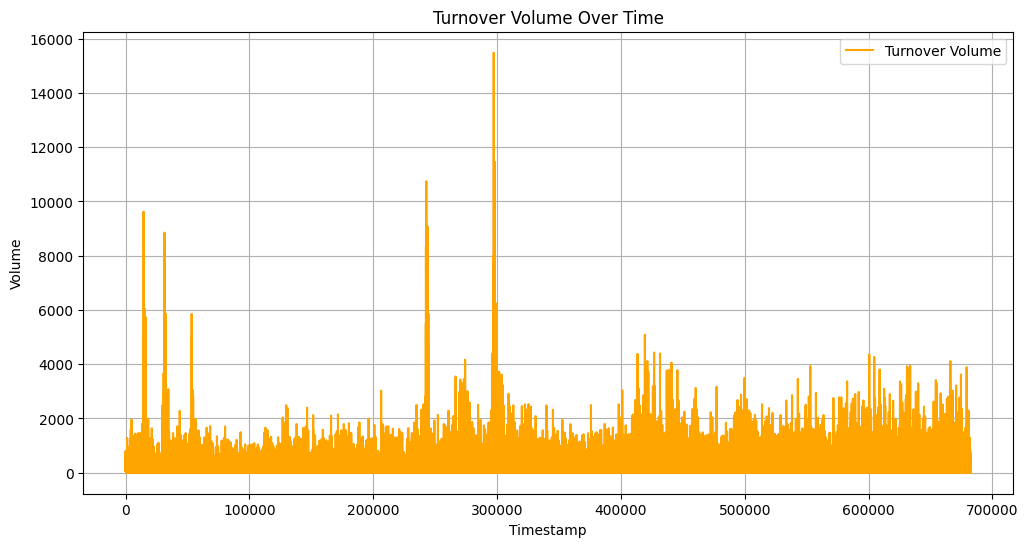

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TURNOVER_VOLUME_HHI'], color='orange', label='Turnover Volume')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title('Turnover Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()